# Métricas de avaliação de modelos:
* KS
* Gini
* AUC
* RMSE
* MAE
* F1
* Recall
* Precision
* R2
 ---
## Definição de métricas de avaliação:

<p>Uma métrica de avaliação quantifica o desempenho de modelo preditivo.</p>

* Por quê as metricas são importantes?
    * Objetivo de treinamento (cost function) é somente um proxy para objetivos do mundo real.
    * Métricas ajudam a capturar um objetivo de negócio para um alvo quantitativo (nem todos os erros são iguais)
    * Ajuda a organizar o esforço do time de ML (Machine Learning) em direção ao alvo.
        * Geralmente na forma de melhorar a métrica no dev set.
    * Útil em quantificar o "vão" entre:
        * Performance desejada e patamar (estimativa de esforço inicial).
        * Performance desejada e performance atual.
        * Medida de progresso no tempo.
    * Útil para tarefas de nível baixo e debugar.
---    
## Conhecimento base:

* **TPR (True Positive Rate)**: é a probabilidade de que o modelo detecte um positivo real como positivo. Em outras palavras, é a proporção dos positivos reais  que são detectados como positivos pelo modelo. Também é conhecido como <code>sensitivity</code>. Matematicamente: $$TPR=P(\widehat{x}=1|x=1)$$

* **TNR (True Negative Rate)**: é a probabilidade de que o modelo detecte um negativo real como negativo. Em outras palavras, é a proporção dos negativos reais que são detectados como negativos pelo modelo. Também é conhecido como <code>specificity</code>. Matematicamente: $$TNR=P(\widehat{x}=0|x=0)$$ 

* **FPR (False Positive Rate)**: é a probabilidade que o modelo detecte um negativo real como positivo. Em outras palavras, é a proporção dos negativos reais que são detectados como positivos pelo modelo. Também é conhecido como <code>Type I error</code>. Matematicamente: $$FPR=P(\widehat{x}=1|x=0)$$

* **FNR (False Negative Rate)**: é a probabilidade que o modelo detecte um positivo real como negativo. Em outras palavras, é a proporção dos positivos reais que são detectados como negativos pelo modelo. Também é conhecido como <code> Type II error</code>. Matematicamente: $$FNR=P(\widehat{x}=0|x=1)$$  

**Um bom método de apresentar os números é com confusion matrix/contingency.**

* Abaixo temos um exemplo de confusion matrix:
    * Vamos importar a função confusion_matrix do sklearn.metrics para calcular

In [42]:
from sklearn.metrics import confusion_matrix

y_true = [1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0]
y_pred =  [1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0]
confusion_m = confusion_matrix(y_true, y_pred)
print(confusion_m)

[[5 2]
 [1 4]]


Como vemos acima nos é entregue um array contendo 5, 2, 1, 4 para ilustrar melhor como interpretar vamos criar novamente os dados acima, mas agora usando pandas para que seja possível explicar de uma forma mais simples.

In [39]:
import pandas as pd

data = {'y_Actual':    [1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0],
        'y_Predicted': [1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0]
        }

df = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])

confusion_matrix = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])
print (confusion_matrix)

Predicted  0  1
Actual         
0          5  2
1          1  4


Agora podemos observar que temos as colunas sendo nomeadas como 0 e 1 assim como as linha. Portanto quando temos a combinação:

linha 0 e coluna 0 determinamos **TP (True Positive)**

linha 0 e coluna 1 determinamos **FP (False Positive)**

linha 1 e coluna 0 determinamos **FN (False Negative)**

linha 1 e coluna 1 determinamos **TN (True Negative)**

Portanto:

In [41]:
print("\nTP (True Positive) = {}\nFP (False Positive) = {} \nFN (False Negative) = {}\nTN (True Negative) = {}".format(
                            confusion_m[0][0], confusion_m[0][1],
                            confusion_m[1][0], confusion_m[1][1]))


TP (True Positive) = 5
FP (False Positive) = 2 
FN (False Negative) = 1
TN (True Negative) = 4


Ainda podemos criar um mapa de calor usando as bibliotecas seaborn e matplotlib para conseguirmos uma fácil e rápida identificação.

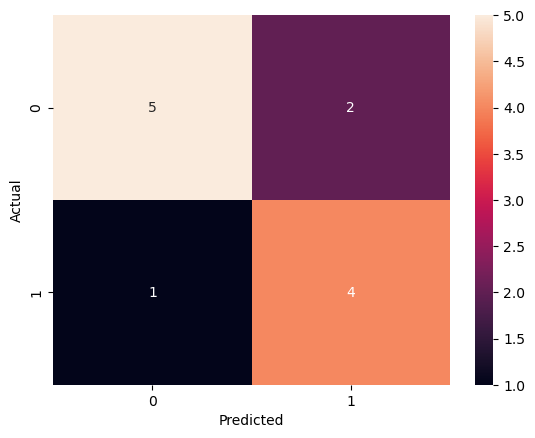

In [13]:
import seaborn as sn
import matplotlib.pyplot as plt

data = {'y_Actual':    [1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0],
        'y_Predicted': [1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0]
        }

df = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])
confusion_matrix = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])

sn.heatmap(confusion_matrix, annot=True)
plt.show()

Podemos determinar a acuracidade do modelo com a fórmula **$\frac{(TP+TN)}{(TP+TN+FP+FN)} = \frac{5+4}{5+4+2+1}=\frac{9}{12}=0.75$** . Abaixo veremos como verificar melhor a eficiência de uma modelo seguindo métricas avaliativas mais completas.

Mas antes vamos definir como são calculados o TPR, TNR, FPR e FNR para podermos seguir com os modelos:

* **TPR (True Positive Rate)**: $\frac{TP}{(TP+FN)}$
* **FNR (False Negative Rate)**: $\frac{TN}{(TN+FP)}$

* **FPR (False Positive Rate)**: $\frac{FP}{(FP+TN)}$
* **FNR (False Negative Rate)**: $\frac{FN}{(FN+TP)}$

## KS (Kolmogorov-Smirnov)

É a diferença máxima entre TPR e FPR.

Como computar KS?

* **Passo 01**: ume vez que a probabilidade de previsão do modelo foi obtida, as observações são classificadas em ordem decrescente pela pontuação de probabilidade. Dessa forma podemos experar que as linha em cima possam ser classificadas como 1, enquanto as linhas ao fim serão 0.

* **Passo 02**: Todas as observações são então divididas em 10 buckets de tamanhos iguais (bins).

* **Passo 03**: Então, como falado anteriormente KS é a diferença máxima entre TPR (nesse caso 1) e FPR (nesse caso 0).